In [80]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

In [3]:
diabetes = load_diabetes()

In [41]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [7]:
diabetes.data.shape

(442, 10)

In [8]:
diabetes.target.shape

(442,)

In [9]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
import pandas as pd

In [18]:
pd.set_option('precision', 4)

pd.set_option('max_columns', 11)

pd.set_option('display.width', None)

In [20]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['DiseaseProg'] = pd.Series(diabetes.target)

In [21]:
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProg
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.0417,0.0507,0.0197,0.0597,-0.0057,-0.0026,-0.0287,-0.0026,0.0312,0.0072,178.0
438,-0.0055,0.0507,-0.0159,-0.0676,0.0493,0.0792,-0.0287,0.0343,-0.0181,0.0445,104.0
439,0.0417,0.0507,-0.0159,0.0173,-0.0373,-0.0138,-0.0250,-0.0111,-0.0469,0.0155,132.0
440,-0.0455,-0.0446,0.0391,0.0012,0.0163,0.0153,-0.0287,0.0266,0.0445,-0.0259,220.0


In [22]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProg
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-3.6396e-16,1.3099e-16,-8.0140e-16,1.2898e-16,-9.0425e-17,1.3011e-16,-4.5640e-16,3.8632e-16,-3.8481e-16,-3.3985e-16,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,-1.2678e-01,-1.1561e-01,-1.0231e-01,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,-3.4248e-02,-3.0358e-02,-3.5117e-02,-3.9493e-02,-3.3249e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6706e-03,-4.3209e-03,-3.8191e-03,-6.5845e-03,-2.5923e-03,-1.9476e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,2.8358e-02,2.9844e-02,2.9312e-02,3.4309e-02,3.2433e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,1.5391e-01,1.9879e-01,1.8118e-01,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


In [23]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

In [25]:
sample_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProg
80,0.0708,-0.0446,0.0121,0.0425,0.0714,0.0535,0.0523,-0.0026,0.0254,-0.0052,143.0
325,-0.0019,-0.0446,0.0542,-0.0665,0.0727,0.0566,-0.0434,0.0849,0.0845,0.0486,192.0
227,0.0671,0.0507,-0.0299,0.0574,-0.0002,-0.0157,0.0744,-0.0506,-0.0385,0.0072,108.0
298,0.0235,0.0507,-0.0375,-0.0470,-0.0910,-0.0755,-0.0324,-0.0395,-0.0308,-0.0135,129.0
58,0.0417,-0.0446,-0.0644,0.0356,0.0122,-0.0580,0.1812,-0.0764,-0.0006,-0.0508,170.0


In [28]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(font_scale=2)

sns.set_style('whitegrid')

In [38]:
#Remove the commenting from these lines to see the corollary graphs of features to target. 
#I commented it out because it made it annoying to scroll through the document.
#for feature in diabetes.feature_names:
  #plt.figure(figsize=(16, 9))
  #sns.scatterplot(data=sample_df, x=feature, y='DiseaseProg', hue='DiseaseProg', palette='cool', legend=False)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=42)

In [50]:
#X_train 
#X_test
#y_train
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184., 144., 150., 280., 125.,  59.,  65., 281., 277., 167.,  90.,
        72., 178.,  88., 270., 101., 197.,  97.,  53.,  71., 262.,  52.,
       102.])

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 10), (111, 10), (331,), (111,))

In [54]:
lin_reg = LinearRegression()

In [56]:
lin_reg.fit(X=X_train, y=y_train)

LinearRegression()

In [57]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [59]:
for i, name in enumerate(diabetes.feature_names): print(f'{name:>10}: {lin_reg.coef_[i]}')
#positive result = direct relationship
#negative result = indirect relationship

       age: 47.74657117353083
       sex: -241.99180361087875
       bmi: 531.9685689647108
        bp: 381.5652992182253
        s1: -918.4902055208906
        s2: 508.2514738468459
        s3: 116.9404049801572
        s4: 269.4850857088445
        s5: 695.8062205026963
        s6: 26.323431441266933


In [60]:
predicted = lin_reg.predict(X_test)
expected = y_test

In [61]:
predicted[:5]

array([137.94979889, 182.53621462, 129.85554049, 292.55738727,
       124.86559124])

In [62]:
expected[:5]

array([219.,  70., 202., 230., 111.])

In [63]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

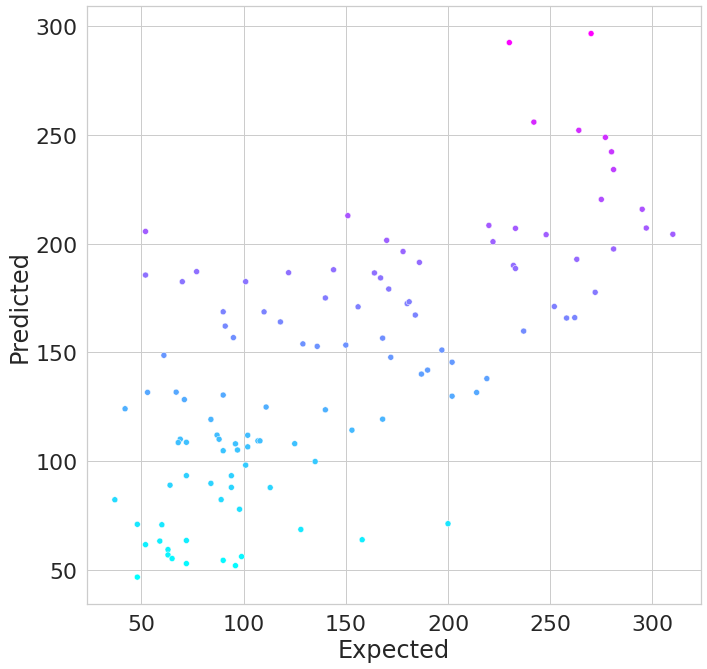

In [73]:

figure = plt.figure(figsize=(11, 11))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

In [66]:
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

In [67]:
axes.set_xlim(start, end)

(37.0, 310.0)

In [68]:
axes.set_ylim(start, end)

(37.0, 310.0)

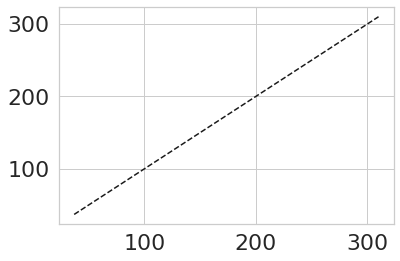

In [69]:
#perfect prediction line
plt.plot([start, end], [start, end], 'k--')

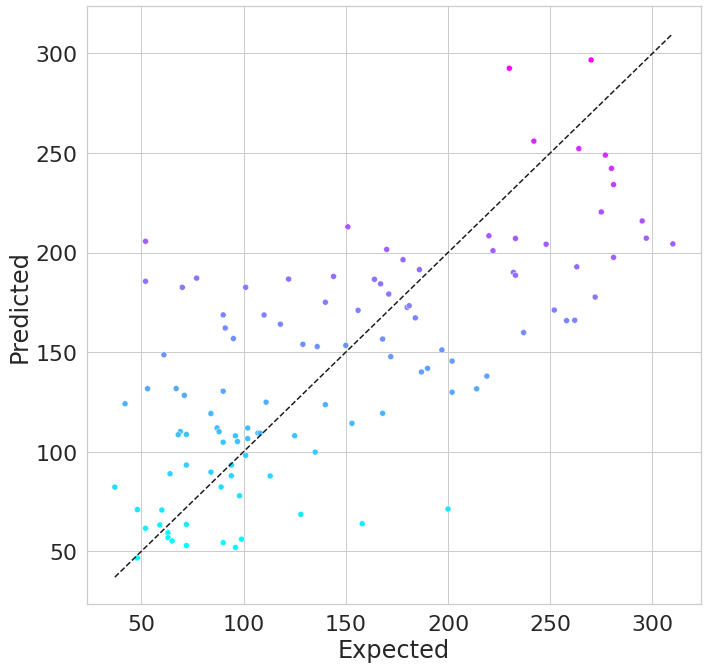

In [72]:
#scatterplot with overlay of the perfect prediction line
figure = plt.figure(figsize=(11, 11))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)
plt.plot([start, end], [start, end], 'k--')

In [75]:
#R2 score calculator
metrics.r2_score(expected, predicted)

0.48490866359057994

In [76]:
#Mean Squared Error Calculation
metrics.mean_squared_error(expected, predicted)

2848.2953079329445

In [79]:
estimators = {'LinearRegression': lin_reg, 'ElasticNet': ElasticNet(), 'Lasso': Lasso(), 'Ridge': Ridge()}

In [82]:
#This loop tests several models and returns the R2 score for each
#Since being closer to 1 is best, it looks like the Linear Regression and Rigde scored highest with this data set. Although, none of the models scored very high.
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=estimator_object, X=diabetes.data, y=diabetes.target, cv=kfold, scoring='r2') 
    print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')


LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
